In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.7 MB/s eta 0:00:00


In [4]:
best_model_path = "/content/drive/MyDrive/1:1_Srikrishna_Kataru/Pinworm_Detection_Egg_Detection/Models/yolov8_best_model_epoch_15_lr_0.001/weights/best.pt"

In [ ]:
data_yaml = "/content/drive/MyDrive/1:1_Srikrishna_Kataru/Pinworm_Detection_Egg_Detection/Dataset/Pinworm-Egg-Detection-1/data.yaml"

In [ ]:
from ultralytics import YOLO

model = YOLO(best_model_path)

# Run evaluation on the test set to calculate mAP50
results = model.val(data=data_yaml, split='test', conf=0.5, iou=0.5)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.7±0.2 ms, read: 7.3±16.4 MB/s, size: 37.0 KB)
val: Scanning /content/drive/.shortcut-targets-by-id/1iybe42hqUWNrvbQynRlzxp3IXalTXzZw/1:1_Srikrishna_Kataru/Pinworm_Detection_Egg_Detection/Dataset/Pinworm-Egg-Detection-1/test/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 186/186 270.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 12/12 4.2it/s 2.9s
                   all        

In [ ]:
import shutil
shutil.move('/content/runs/detect/val', '/content/drive/MyDrive/1:1_Srikrishna_Kataru/Pinworm_Detection_Egg_Detection/Results/Test results')

'/content/drive/MyDrive/1:1_Srikrishna_Kataru/Pinworm_Detection_Egg_Detection/Results/Test results/val'

#inferencing

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/drive/MyDrive/1:1_Srikrishna_Kataru/Pinworm_Detection_Egg_Detection/Dataset/Pinworm-Egg-Detection-1/test/images/Enterobius-vermicularis_0002_jpg.rf.2735df5db44f49326e658ae666e3263e.jpg: 640x640 1 pinworm_egg, 872.0ms
Speed: 7.8ms preprocess, 872.0ms inference, 37.1ms postprocess per image at shape (1, 3, 640, 640)


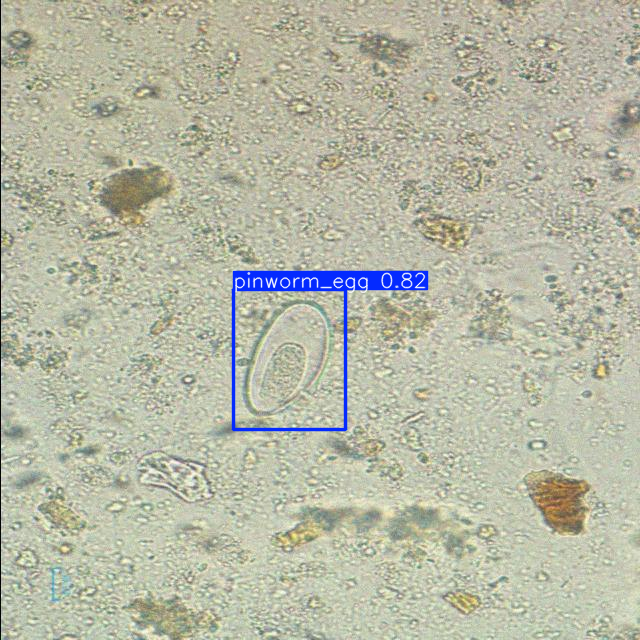

Pre-process: 7.85ms
Inference: 871.95ms
Post-process: 37.08ms
Total time per image: 916.88ms


In [5]:
from ultralytics import YOLO

# 1. Load a model (pre-trained or custom)
model = YOLO(best_model_path)  # Nano model, downloads automatically

# 2. Run inference on an image
results = model('/content/drive/MyDrive/1:1_Srikrishna_Kataru/Pinworm_Detection_Egg_Detection/Dataset/Pinworm-Egg-Detection-1/test/images/Enterobius-vermicularis_0002_jpg.rf.2735df5db44f49326e658ae666e3263e.jpg')

# 3. View results (displays in a window)
results[0].show()

# 4. Save results to disk
results[0].save(filename='result.jpg')
for result in results:
    # The 'speed' dictionary contains times in milliseconds
    pre = result.speed['preprocess']
    inf = result.speed['inference']
    post = result.speed['postprocess']

    total_time = pre + inf + post

    print(f"Pre-process: {pre:.2f}ms")
    print(f"Inference: {inf:.2f}ms")
    print(f"Post-process: {post:.2f}ms")
    print(f"Total time per image: {total_time:.2f}ms")
